## Project Name: Sentiment Analysis - Product Review

### Project Type: Unsupervised Machine Learning Model using Clustering Algorithm

#### Intoduction about Data set of Project:

## Step 1:Problem Statement

#### Main Goal of Our Project:

## Step 2:Data Gathering

#### Importing Necessary Libraries

In [1]:
! pip install collections-extended
! pip install langdetect
! pip install googletrans
! pip install seaborn
! pip install contractions
! pip install unidecode
! pip install googletrans==3.1.0a0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=4373844ba68a202dcc3acc6691fade0c1502f7ddf2c4cd82dd2bcc7d7a4b6f25
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 k

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
from langdetect import detect
from googletrans import Translator
import contractions
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from unidecode import unidecode
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from gensim.models import Word2Vec
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('dataset_es_train.csv')
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [7]:
data.shape

(100000, 8)

### Here we are take 5000 records of product_category for analysis.

In [161]:
data1 = data.sample(5000).reset_index(drop=True)

In [162]:
# Extracting the required columns ['review_body'] to build our model
df = data1[['review_body']]
df

,review_body
0,No vienen 48 piezas vienen menos
1,"No cumplen lo dicho, mejor comprarse unos de m..."
2,Cuesta la vida ponerla porque no cuadra bien l...
3,"La funda bien,el protector venía roto y no se ..."
4,Es muy flojo y no da nada de seguridad en el c...
...,...
4995,El tamaño es ideal pero al poco de estar colga...
4996,La verdad es que es más grande de lo que esper...
4997,No me llegó ni me han devuelto el dinero ni nada.
4998,Los cartuchos han dado incompatibilidad con la...


In [163]:
# Function for language detection
def lang_detect(data):
    lang = detect(data)
    return lang

In [164]:
# Function for language translation (output is in english text)
def lang_trans(data):
    translor = Translator()
    translated_text = translor.translate(data)
    return translated_text.text

In [165]:
# Detecting and adding 'language' column
df['language'] = df.review_body.apply(lang_detect)
df

,review_body,language
0,No vienen 48 piezas vienen menos,lv
1,"No cumplen lo dicho, mejor comprarse unos de m...",es
2,Cuesta la vida ponerla porque no cuadra bien l...,es
3,"La funda bien,el protector venía roto y no se ...",es
4,Es muy flojo y no da nada de seguridad en el c...,es
...,...,...
4995,El tamaño es ideal pero al poco de estar colga...,es
4996,La verdad es que es más grande de lo que esper...,es
4997,No me llegó ni me han devuelto el dinero ni nada.,it
4998,Los cartuchos han dado incompatibilidad con la...,es


df.language.value_counts()

In [166]:
# Translating and adding 'translated_reviews' column
df['translated_reviews'] = df.review_body.apply(lang_trans)
df

,review_body,language,translated_reviews
0,No vienen 48 piezas vienen menos,lv,"They do not come 48 pieces, they come less"
1,"No cumplen lo dicho, mejor comprarse unos de m...",es,"They do not comply with what has been said, it..."
2,Cuesta la vida ponerla porque no cuadra bien l...,es,It's hard to put it on because the measurement...
3,"La funda bien,el protector venía roto y no se ...",es,"The case is fine, the protector was broken and..."
4,Es muy flojo y no da nada de seguridad en el c...,es,It is very loose and does not provide any secu...
...,...,...,...
4995,El tamaño es ideal pero al poco de estar colga...,es,The size is ideal but shortly after being hung...
4996,La verdad es que es más grande de lo que esper...,es,The truth is that it is bigger than I expected...
4997,No me llegó ni me han devuelto el dinero ni nada.,it,It didn't arrive nor did they return my money ...
4998,Los cartuchos han dado incompatibilidad con la...,es,The cartridges have become incompatible with t...


In [167]:
# preprocessing the text records
# 1. remove spaces,newlines
def remove_spaces(data):
    clean_text = data.replace('\\n',' ').replace("\t",' ').replace('\\',' ')
    return clean_text

# 2. contraction mapping
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3.handling accented character
def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text

# 4. Cleaning
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list)
                  and (len(word)>2) and (word.isalpha())]
    return clean_text

# 5.autocorrect
def autocorrection(data):
    spell = Speller(lang='en')
    corrected_text = spell(data)
    return corrected_text

# 6. lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data :
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return " ".join(final_data)

In [168]:
clean_text_train = df.translated_reviews.apply(remove_spaces)

clean_text_train = clean_text_train.apply(expand_text)

clean_text_train = clean_text_train.apply(handling_accented)

clean_text_train = clean_text_train.apply(clean_data)

clean_text_train = clean_text_train.apply(lemmatization)

In [169]:
clean_text_train

0                                  not come piece come le
1       not comply said better buy one higher price qu...
2       hard put measurement not fit well therefore pr...
3       case fine protector broken not correspond phon...
4       loose not provide security carrying baby move ...
                              ...                        
4995    size ideal shortly hung blackboard came door g...
4996    truth bigger expected strap closure seem good ...
4997                 not arrive nor return money anything
4998    cartridge become incompatible printer not fond...
4999    great price quality arrived expected date well...
Name: translated_reviews, Length: 5000, dtype: object

# Text Vectorization

## 1.count vectorizer


In [170]:
#  count_vect_data data for word2vec k_means model

count_vect = CountVectorizer()
count_vect_data = count_vect.fit_transform(clean_text_train).A
pd.DataFrame(count_vect_data,columns=count_vect.get_feature_names_out())

,aaa,abandoned,aberration,able,abroad,abrupt,absence,absent,absolute,absolutely,...,yongnuo,young,younger,youtube,zeleris,zero,zip,zipper,zoom,zoon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. TF-IDF


In [171]:
#  tfidf_data data for word2vec k_means model

tfidf_vect = TfidfVectorizer()
tfidf_data = tfidf_vect.fit_transform(clean_text_train).A
pd.DataFrame(tfidf_data,columns= tfidf_vect.get_feature_names_out())

,aaa,abandoned,aberration,able,abroad,abrupt,absence,absent,absolute,absolutely,...,yongnuo,young,younger,youtube,zeleris,zero,zip,zipper,zoom,zoon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Word2vec

In [172]:
sentences = clean_text_train.tolist()
splitted_sent = [sent.split() for sent in sentences]

In [173]:
word2vec_model = Word2Vec(splitted_sent,min_count=2,window=3)

In [174]:
word2vec_model.save("word2vec.model")

In [175]:
word2vec_model.vector_size

100

In [176]:
# document numerical format (creating vectors of splited sentences)
def vectorizer(list_of_docs,model):
    feature = []
    for rew in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for word in rew:
            try:
                word in model.wv
                vectors.append(model.wv[word])
            except KeyError:
                continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            feature.append(avg_vec)
        else:
            feature.append(zero_vector)
    return feature

In [177]:
vectorized_docs = vectorizer(splitted_sent, word2vec_model)

In [178]:
#  word2vec_data data for word2vec k_means model
word2vec_data = np.array(vectorized_docs)
word2vec_data

array([[-0.08243224,  0.37806633,  0.26790291, ..., -0.43143177,
         0.06779303,  0.00653173],
       [-0.06631669,  0.2981312 ,  0.20362888, ..., -0.33444405,
         0.05413854,  0.01794131],
       [-0.06914929,  0.30405283,  0.20623259, ..., -0.35184991,
         0.05651915,  0.00469564],
       ...,
       [-0.07237371,  0.35290048,  0.25564617, ..., -0.40082833,
         0.06922466,  0.01239455],
       [-0.05207978,  0.22252698,  0.15629433, ..., -0.25402522,
         0.0411506 ,  0.00843247],
       [-0.05547156,  0.25238428,  0.16574903, ..., -0.28190657,
         0.04601442,  0.01059769]])

## Building k-means clustering models and generating target column

In [179]:
# k-means model for >> Count vectorizer
#                   >> TFIDF
#                   >> Word2Vec

In [180]:
# build k-means model
def build_kmeans(clusters, data):
    kmeans_model = KMeans(n_clusters=clusters)
    y_pred = kmeans_model.fit_predict(data)
    return kmeans_model, y_pred

In [181]:
# kmeans - Count Vectorizer model
kmeans_model_count, count_pred = build_kmeans(3,count_vect_data)

In [ ]:
# kmeans-TFIDF model
kmeans_model_tfidf, tfidf_pred = build_kmeans(3,tfidf_data)

In [ ]:
# kmeans word2vec model
kmeans_model_word2vec, word2vec_pred = build_kmeans(3, word2vec_data)

##  Analysing the Silhouette Score

In [184]:
print(f"1. Silhouette score with kmeans-count model : {round(silhouette_score(count_vect_data,count_pred),3)*100} %")

print(f"2. Silhouette score with kmeans-tfidf model : {round(silhouette_score(tfidf_data,tfidf_pred),3)*100} %")

print(f"3. Silhouette score with kmeans-word2vec model : {round(silhouette_score(word2vec_data,word2vec_pred),3)*100} %")

1. Silhouette score with kmeans-count model : 8.3 %
2. Silhouette score with kmeans-tfidf model : 0.3 %
3. Silhouette score with kmeans-word2vec model : 49.0 %


In [197]:
def visualize_silhouette(data,model,title):
    print(f"Silhouette Score Visualizer for {title}")
    visualizer = SilhouetteVisualizer(model,colors="yellowbrick")
    visualizer.fit(data)
    visualizer.show()

Silhouette Score Visualizer for kmeans-Count Vectorizer


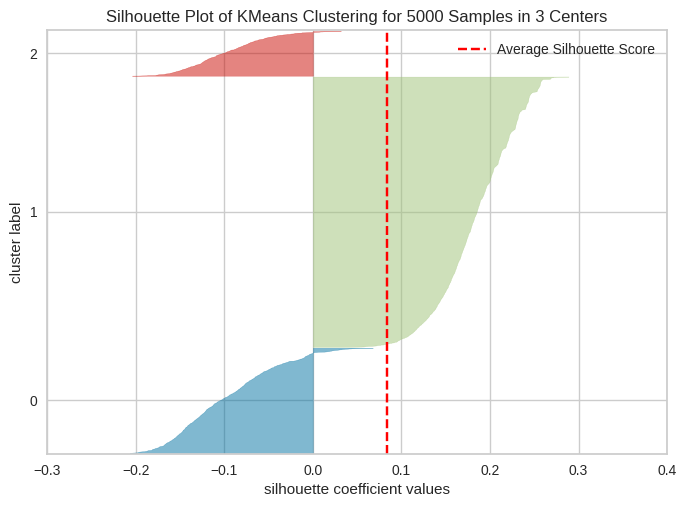

In [198]:
# Visualize the Silhouette Score for kmeans-Count Vectorizer model
visualize_silhouette(count_vect_data,kmeans_model_count,"kmeans-Count Vectorizer")

Silhouette Score Visualizer for kmeans-tfidf Vectorizer


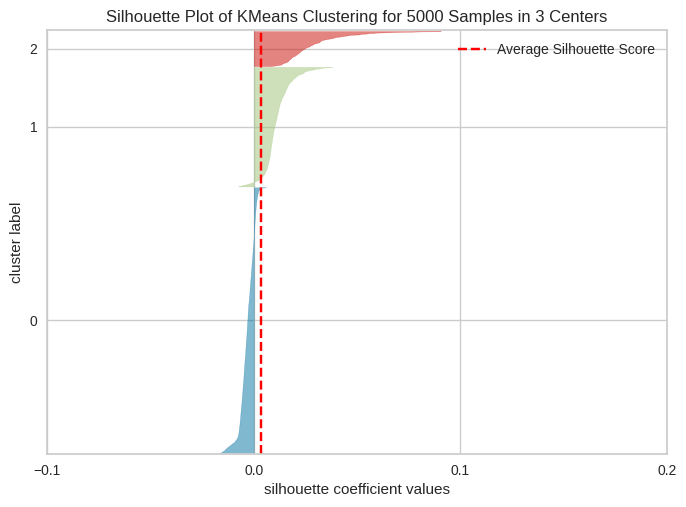

In [199]:
# Visualize the Silhouette Score for kmeans-TFIDF Vectorizer model
visualize_silhouette(tfidf_data,kmeans_model_tfidf,"kmeans-tfidf Vectorizer")

Silhouette Score Visualizer for kmeans-word2vec


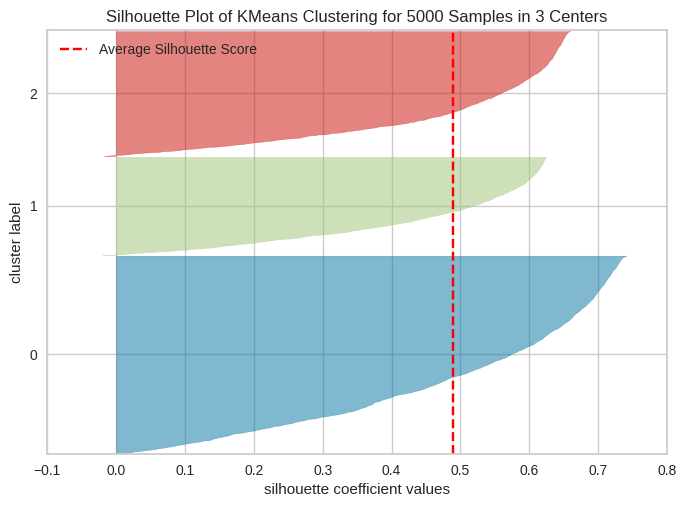

In [200]:
# Visualize the Silhouette Score for kmeans-word2vec model
visualize_silhouette(word2vec_data,kmeans_model_word2vec,"kmeans-word2vec")

In [201]:
# adding word2vec_pred which gives better Silhouette Score as a target column in review data df
df['target'] = pd.Series(word2vec_pred)
df

,review_body,language,translated_reviews,target
0,No vienen 48 piezas vienen menos,lv,"They do not come 48 pieces, they come less",2
1,"No cumplen lo dicho, mejor comprarse unos de m...",es,"They do not comply with what has been said, it...",0
2,Cuesta la vida ponerla porque no cuadra bien l...,es,It's hard to put it on because the measurement...,2
3,"La funda bien,el protector venía roto y no se ...",es,"The case is fine, the protector was broken and...",2
4,Es muy flojo y no da nada de seguridad en el c...,es,It is very loose and does not provide any secu...,0
...,...,...,...,...
4995,El tamaño es ideal pero al poco de estar colga...,es,The size is ideal but shortly after being hung...,1
4996,La verdad es que es más grande de lo que esper...,es,The truth is that it is bigger than I expected...,2
4997,No me llegó ni me han devuelto el dinero ni nada.,it,It didn't arrive nor did they return my money ...,2
4998,Los cartuchos han dado incompatibilidad con la...,es,The cartridges have become incompatible with t...,1


In [202]:
df['target'].value_counts()

0    2348
2    1486
1    1166
Name: target, dtype: int64

## Analysing Target classes with resp. to reviews for target classes sentiments labeling

In [203]:
#  Class - 0 reviews
df[df.target == 0][['translated_reviews']]

,translated_reviews
1,"They do not comply with what has been said, it..."
4,It is very loose and does not provide any secu...
8,It is a poor quality watch for the value it ha...
9,"The book is not in a condition to be sold, if ..."
11,It is the original but it says that they come ...
...,...
4986,I ordered it more than a month ago and it stil...
4988,"Beautiful and ideal size, the only fault is th..."
4990,"It's a little smaller, it works, but there are..."
4992,"Hello, the truth is that reading all the comme..."


In [204]:
#  Class - 1 reviews
df[df.target == 1][['translated_reviews']]

,translated_reviews
5,"After installing it and turning it on, when co..."
6,It arrived quickly but only A4 sheets fit. The...
12,"Don't do like me and get caught, spend a littl..."
14,"All the knobs come off, shameful"
15,Where can you find the audios and answers?
...,...
4991,I haven't been able to use it much because I'v...
4993,"Inconvenient, and very expensive for the funct..."
4994,"The dog has adapted to the first one, she is o..."
4995,The size is ideal but shortly after being hung...


In [205]:
#  Class - 2 reviews
df[df.target == 2][['translated_reviews']]

,translated_reviews
0,"They do not come 48 pieces, they come less"
2,It's hard to put it on because the measurement...
3,"The case is fine, the protector was broken and..."
7,"It's not bad, but I don't think it leaves the ..."
10,L button BROKEN OUT OF PLACE
...,...
4982,It's what I expected. No more no less. It's no...
4984,Bad bad In my case it lasted two days well. Th...
4989,They are too small
4996,The truth is that it is bigger than I expected...


In [ ]:
# From the above analysis now the target column category classes are labeled as:
# Class - 0 = Negative
# Class - 1 = Neutral
# Class - 2 = Positive

In [206]:
df1 = df.replace({0: 'Negative', 1: 'Neutral', 2: 'Positive'})

In [207]:
# Now we get Supervised data in which target column as an sentiments are added.
df1

,review_body,language,translated_reviews,target
0,No vienen 48 piezas vienen menos,lv,"They do not come 48 pieces, they come less",Positive
1,"No cumplen lo dicho, mejor comprarse unos de m...",es,"They do not comply with what has been said, it...",Negative
2,Cuesta la vida ponerla porque no cuadra bien l...,es,It's hard to put it on because the measurement...,Positive
3,"La funda bien,el protector venía roto y no se ...",es,"The case is fine, the protector was broken and...",Positive
4,Es muy flojo y no da nada de seguridad en el c...,es,It is very loose and does not provide any secu...,Negative
...,...,...,...,...
4995,El tamaño es ideal pero al poco de estar colga...,es,The size is ideal but shortly after being hung...,Neutral
4996,La verdad es que es más grande de lo que esper...,es,The truth is that it is bigger than I expected...,Positive
4997,No me llegó ni me han devuelto el dinero ni nada.,it,It didn't arrive nor did they return my money ...,Positive
4998,Los cartuchos han dado incompatibilidad con la...,es,The cartridges have become incompatible with t...,Neutral
